In [364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 출력할 최대 행 및 열 수 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# sns.set() 설정값을 리셋해주는 함수
def pltconfig_default() :
  sns.reset_defaults()
  %matplotlib inline

pltconfig_default()

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list


In [365]:
df = pd.read_csv('solar_data.csv')

df.head()

# 필요 데이터만 선별

df = df[['STATIONNO', 'EVTDATME','READTIME', 'INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9', 'INV10', 'INA1', 'INA2', 'INA3', 'INA4', 'INA5', 'INA6', 'INA7', 'INA8', 'INA9', 'INA10', 'OUTVR', 'OURVS', 'OUTVT', 'OUTAR', 'OUTAS', 'OUTAT', 'PF', 'FRQ', 'TPG', 'CPG', 'CTPG', 'RUNTYPE']]

In [366]:
df.head()

,STATIONNO,EVTDATME,READTIME,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,INV10,INA1,INA2,INA3,INA4,INA5,INA6,INA7,INA8,INA9,INA10,OUTVR,OURVS,OUTVT,OUTAR,OUTAS,OUTAT,PF,FRQ,TPG,CPG,CTPG,RUNTYPE
0,1,2023-11-21 16:08:38,20231121 1608,598.0,588.0,591.0,543.0,554.0,559.0,542.0,553.0,546.0,0.0,5.0,6.0,6.0,5.0,2.0,2.0,3.0,2.0,2.0,0.0,404.0,403.0,405.0,28.0,29.0,30.0,6459.0,60.0,8000,2209000,437000.0,1
1,1,2023-11-21 16:11:38,20231121 1611,603.0,598.0,595.0,547.0,550.0,556.0,545.0,563.0,547.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,0.0,403.0,403.0,404.0,27.0,27.0,28.0,6460.0,60.0,1000,2210000,438000.0,1
2,1,2023-11-21 16:14:38,20231121 1614,599.0,593.0,593.0,549.0,547.0,559.0,539.0,561.0,550.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,0.0,404.0,404.0,405.0,25.0,25.0,27.0,6460.0,60.0,1000,2211000,439000.0,1
3,1,2023-11-21 16:17:38,20231121 1617,605.0,597.0,597.0,547.0,550.0,571.0,542.0,566.0,557.0,0.0,5.0,5.0,5.0,4.0,2.0,2.0,2.0,2.0,2.0,0.0,404.0,403.0,404.0,23.0,24.0,25.0,6461.0,60.0,1000,2212000,440000.0,1
4,1,2023-11-21 16:20:38,20231121 1620,601.0,599.0,591.0,561.0,550.0,586.0,541.0,569.0,561.0,0.0,4.0,4.0,4.0,3.0,2.0,1.0,2.0,2.0,1.0,0.0,403.0,402.0,404.0,21.0,22.0,23.0,6462.0,60.0,0,2212000,440000.0,1


In [367]:

# kWh 단위
df['CTPG'] = df['CTPG']/1000

df.head()

,STATIONNO,EVTDATME,READTIME,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,INV10,INA1,INA2,INA3,INA4,INA5,INA6,INA7,INA8,INA9,INA10,OUTVR,OURVS,OUTVT,OUTAR,OUTAS,OUTAT,PF,FRQ,TPG,CPG,CTPG,RUNTYPE
0,1,2023-11-21 16:08:38,20231121 1608,598.0,588.0,591.0,543.0,554.0,559.0,542.0,553.0,546.0,0.0,5.0,6.0,6.0,5.0,2.0,2.0,3.0,2.0,2.0,0.0,404.0,403.0,405.0,28.0,29.0,30.0,6459.0,60.0,8000,2209000,437.0,1
1,1,2023-11-21 16:11:38,20231121 1611,603.0,598.0,595.0,547.0,550.0,556.0,545.0,563.0,547.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,0.0,403.0,403.0,404.0,27.0,27.0,28.0,6460.0,60.0,1000,2210000,438.0,1
2,1,2023-11-21 16:14:38,20231121 1614,599.0,593.0,593.0,549.0,547.0,559.0,539.0,561.0,550.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,0.0,404.0,404.0,405.0,25.0,25.0,27.0,6460.0,60.0,1000,2211000,439.0,1
3,1,2023-11-21 16:17:38,20231121 1617,605.0,597.0,597.0,547.0,550.0,571.0,542.0,566.0,557.0,0.0,5.0,5.0,5.0,4.0,2.0,2.0,2.0,2.0,2.0,0.0,404.0,403.0,404.0,23.0,24.0,25.0,6461.0,60.0,1000,2212000,440.0,1
4,1,2023-11-21 16:20:38,20231121 1620,601.0,599.0,591.0,561.0,550.0,586.0,541.0,569.0,561.0,0.0,4.0,4.0,4.0,3.0,2.0,1.0,2.0,2.0,1.0,0.0,403.0,402.0,404.0,21.0,22.0,23.0,6462.0,60.0,0,2212000,440.0,1


In [368]:
df['EVTDATME']= pd.to_datetime(df['EVTDATME'])

df['YEAR'] = df['EVTDATME'].dt.year
df['MONTH'] = df['EVTDATME'].dt.month
df['DAY'] = df['EVTDATME'].dt.day
df['HOUR'] = df['EVTDATME'].dt.hour
df['MINUTE'] = df['EVTDATME'].dt.minute

In [369]:
df = df[['STATIONNO', 'EVTDATME', 'READTIME', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9', 'INV10', 'INA1', 'INA2', 'INA3', 'INA4', 'INA5', 'INA6', 'INA7', 'INA8', 'INA9', 'INA10', 'OUTVR', 'OURVS', 'OUTVT', 'OUTAR', 'OUTAS', 'OUTAT', 'PF', 'FRQ', 'TPG', 'CPG', 'CTPG', 'RUNTYPE']]

df.head()

,STATIONNO,EVTDATME,READTIME,YEAR,MONTH,DAY,HOUR,MINUTE,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,INV10,INA1,INA2,INA3,INA4,INA5,INA6,INA7,INA8,INA9,INA10,OUTVR,OURVS,OUTVT,OUTAR,OUTAS,OUTAT,PF,FRQ,TPG,CPG,CTPG,RUNTYPE
0,1,2023-11-21 16:08:38,20231121 1608,2023,11,21,16,8,598.0,588.0,591.0,543.0,554.0,559.0,542.0,553.0,546.0,0.0,5.0,6.0,6.0,5.0,2.0,2.0,3.0,2.0,2.0,0.0,404.0,403.0,405.0,28.0,29.0,30.0,6459.0,60.0,8000,2209000,437.0,1
1,1,2023-11-21 16:11:38,20231121 1611,2023,11,21,16,11,603.0,598.0,595.0,547.0,550.0,556.0,545.0,563.0,547.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,0.0,403.0,403.0,404.0,27.0,27.0,28.0,6460.0,60.0,1000,2210000,438.0,1
2,1,2023-11-21 16:14:38,20231121 1614,2023,11,21,16,14,599.0,593.0,593.0,549.0,547.0,559.0,539.0,561.0,550.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,0.0,404.0,404.0,405.0,25.0,25.0,27.0,6460.0,60.0,1000,2211000,439.0,1
3,1,2023-11-21 16:17:38,20231121 1617,2023,11,21,16,17,605.0,597.0,597.0,547.0,550.0,571.0,542.0,566.0,557.0,0.0,5.0,5.0,5.0,4.0,2.0,2.0,2.0,2.0,2.0,0.0,404.0,403.0,404.0,23.0,24.0,25.0,6461.0,60.0,1000,2212000,440.0,1
4,1,2023-11-21 16:20:38,20231121 1620,2023,11,21,16,20,601.0,599.0,591.0,561.0,550.0,586.0,541.0,569.0,561.0,0.0,4.0,4.0,4.0,3.0,2.0,1.0,2.0,2.0,1.0,0.0,403.0,402.0,404.0,21.0,22.0,23.0,6462.0,60.0,0,2212000,440.0,1


In [370]:
sub_df = df[['EVTDATME', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'STATIONNO', 'TPG', 'CPG', 'CTPG']]

sub_df.head()

,EVTDATME,YEAR,MONTH,DAY,HOUR,MINUTE,STATIONNO,TPG,CPG,CTPG
0,2023-11-21 16:08:38,2023,11,21,16,8,1,8000,2209000,437.0
1,2023-11-21 16:11:38,2023,11,21,16,11,1,1000,2210000,438.0
2,2023-11-21 16:14:38,2023,11,21,16,14,1,1000,2211000,439.0
3,2023-11-21 16:17:38,2023,11,21,16,17,1,1000,2212000,440.0
4,2023-11-21 16:20:38,2023,11,21,16,20,1,0,2212000,440.0


In [371]:
cond1 = (df['MONTH'] == 11)
cond2 = (df['DAY'] == 22)

df1 = sub_df[cond1&cond2]

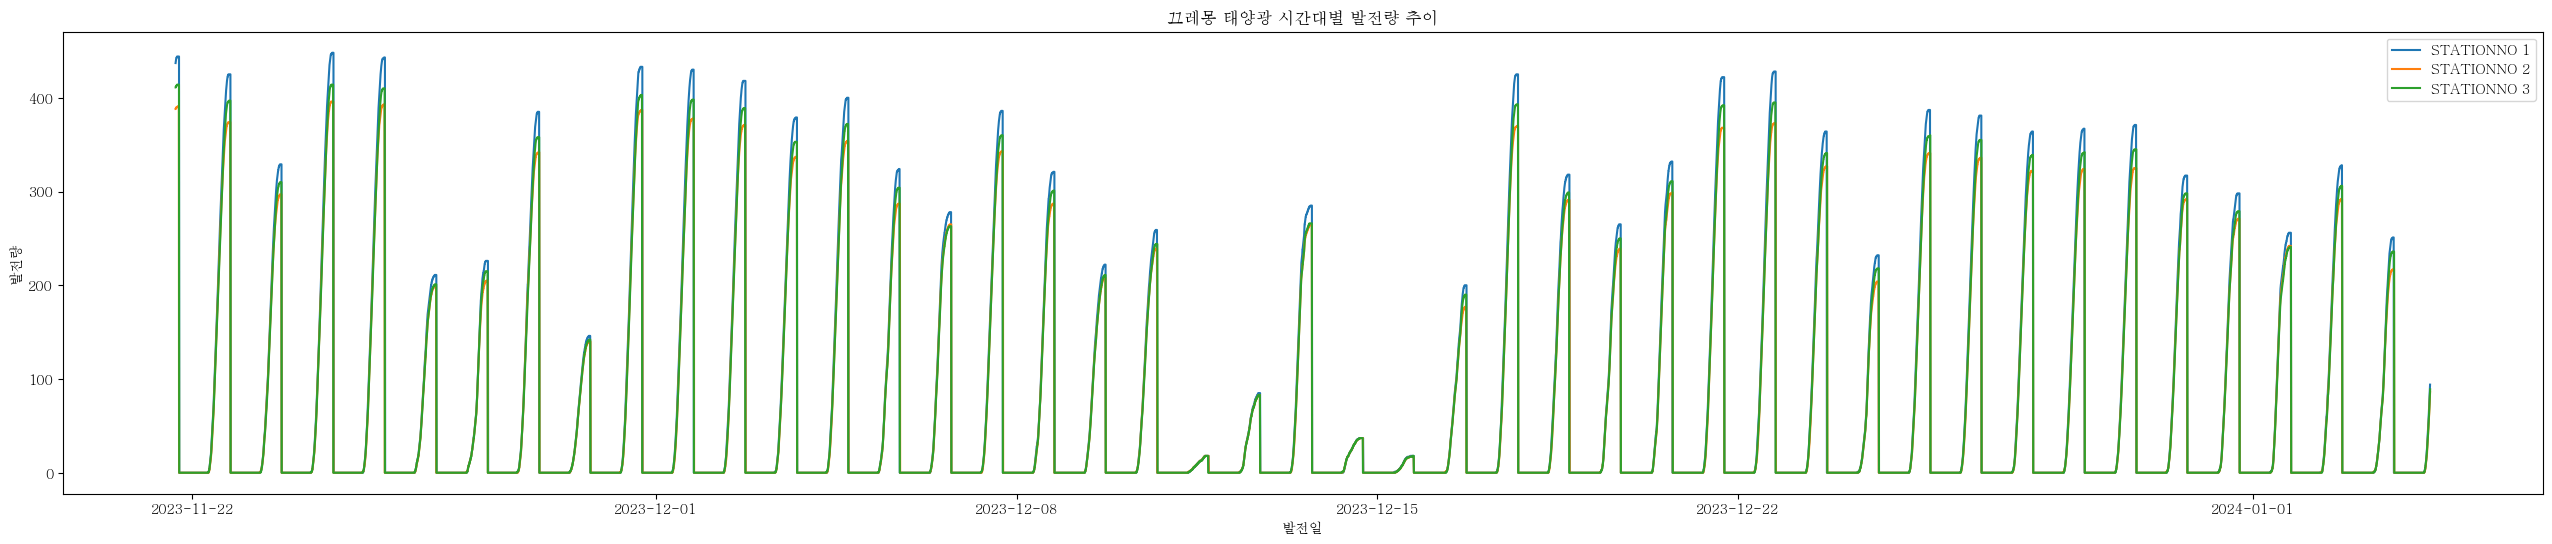

In [372]:

# 그래프 사이즈 조정
plt.figure(figsize=(32, 6))  # 가로 10인치, 세로 6인치

# STATIONNO가 1, 2, 3인 경우를 각각 선택하여 그래프 표시
for station_number in [1, 2, 3]:
    subset = sub_df[sub_df['STATIONNO'] == station_number]
    plt.plot(subset['EVTDATME'], subset['CTPG'], label=f'STATIONNO {station_number}')

plt.xlabel('발전일')
plt.ylabel('발전량')
plt.title('끄레몽 태양광 시간대별 발전량 추이')
plt.legend()
plt.show()

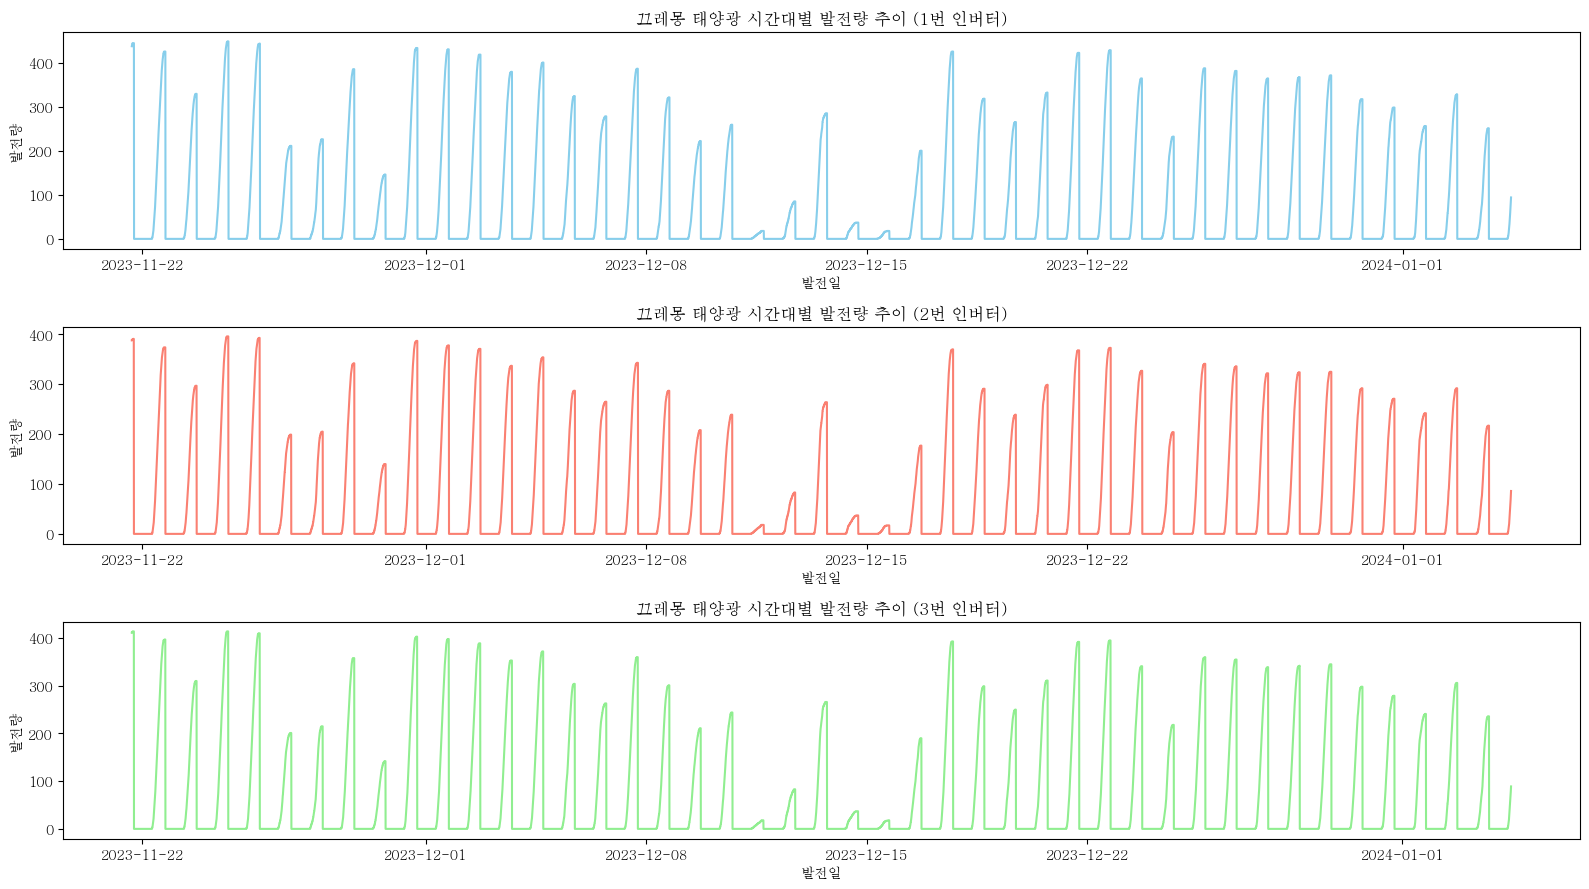

In [373]:
# 각 국번별로 별도의 그래프 표시
fig, axes = plt.subplots(nrows=len(sub_df['STATIONNO'].unique()), figsize=(16,3 * len(sub_df['STATIONNO'].unique())))

colors = ['skyblue', 'salmon', 'lightgreen']

for i, station_number in enumerate(sub_df['STATIONNO'].unique()):
    subset = sub_df[sub_df['STATIONNO'] == station_number]
    axes[i].plot(subset['EVTDATME'], subset['CTPG'], color=colors[i])
    axes[i].set_xlabel('발전일')
    axes[i].set_ylabel('발전량')
    axes[i].set_title(f'끄레몽 태양광 시간대별 발전량 추이 ({station_number}번 인버터)')

plt.tight_layout()  # 그래프 간격 조절
plt.show()

In [374]:
sub_df['Date'] = sub_df['EVTDATME'].dt.strftime("%Y-%m-%d")

sub_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_27200\1068841674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Date'] = sub_df['EVTDATME'].dt.strftime("%Y-%m-%d")


,EVTDATME,YEAR,MONTH,DAY,HOUR,MINUTE,STATIONNO,TPG,CPG,CTPG,Date
0,2023-11-21 16:08:38,2023,11,21,16,8,1,8000,2209000,437.0,2023-11-21
1,2023-11-21 16:11:38,2023,11,21,16,11,1,1000,2210000,438.0,2023-11-21
2,2023-11-21 16:14:38,2023,11,21,16,14,1,1000,2211000,439.0,2023-11-21
3,2023-11-21 16:17:38,2023,11,21,16,17,1,1000,2212000,440.0,2023-11-21
4,2023-11-21 16:20:38,2023,11,21,16,20,1,0,2212000,440.0,2023-11-21


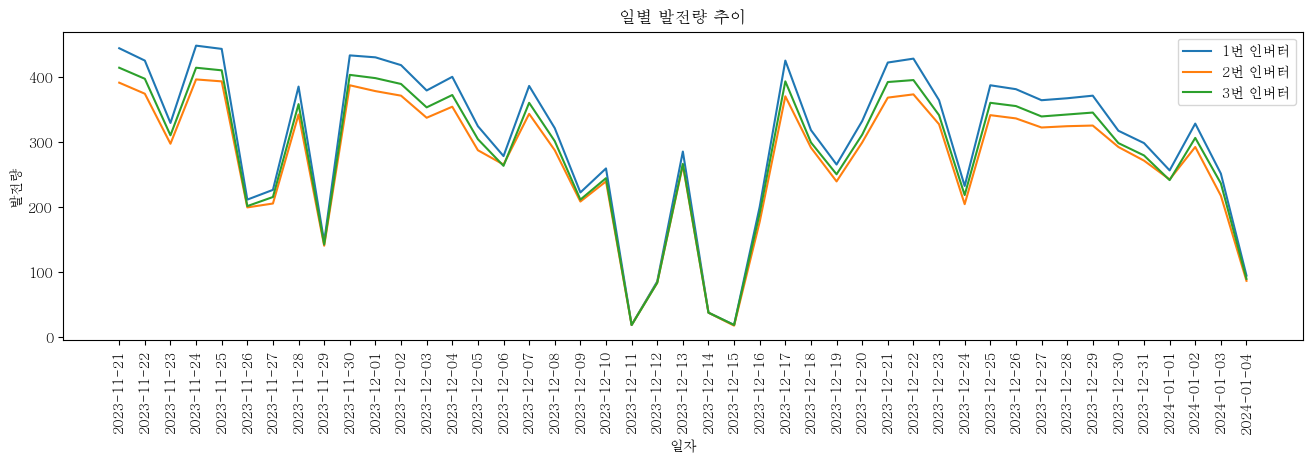

In [375]:
# 날짜별 국번별 CTPG의 최대값 계산
daily_max = sub_df.groupby(['Date', 'STATIONNO'])['CTPG'].max().unstack()

# 그래프 사이즈 조정
plt.figure(figsize=(16, 4))

# 각 국번별로 날짜별 최대값 추이 그래프 표시
for station_number in daily_max.columns:
    plt.plot(daily_max.index, daily_max[station_number], label=f'{station_number}번 인버터')

plt.xlabel('일자')
plt.ylabel('발전량')
plt.title('일별 발전량 추이')
plt.xticks(rotation=90, ha='center')
plt.legend()
plt.show()

In [376]:
daily_max = sub_df.groupby(['Date','STATIONNO'])['CTPG'].max()

daily_max = daily_max.reset_index()

# pivot_daily = daily_max.pivot(index="Date", columns="STATIONNO", values="CTPG")
pivot_daily = daily_max.pivot(index="STATIONNO", columns="Date", values="CTPG")

pivot_daily


# pivot_daily.to_excel('daily_solar_1.xlsx', index=True)

In [377]:
df2 = daily_max.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2['MONTH'] = df2['Date'].dt.month

# 월별로 그룹화하여 국번별 합계 계산
monthly_sum = df2.groupby([df2['MONTH'], 'STATIONNO'])['CTPG'].sum().reset_index()

# 결과 출력
# print(monthly_sum)

# pivot_month = monthly_sum.pivot(index="MONTH", columns="STATIONNO", values="CTPG")
pivot_month = monthly_sum.pivot(index="STATIONNO", columns="MONTH", values="CTPG")

print(pivot_month)

# pivot_month.to_excel('monthly_solar_1.xlsx', index=True)

MONTH         1       11      12
STATIONNO                       
1          929.0  3490.0  9331.0
2          837.0  3124.0  8347.0
3          872.0  3264.0  8724.0


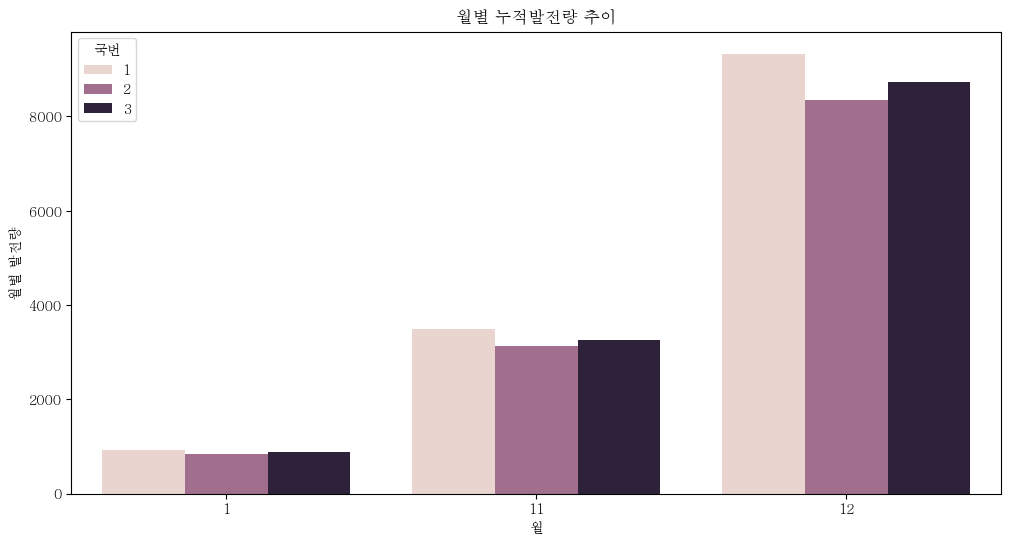

,MONTH,STATIONNO,CTPG
0,1,1,929.0
1,1,2,837.0
2,1,3,872.0
3,11,1,3490.0
4,11,2,3124.0
5,11,3,3264.0
6,12,1,9331.0
7,12,2,8347.0
8,12,3,8724.0


In [378]:
# 월별로 그룹화하여 국번별 합계 계산
monthly_sum = df2.groupby([df2['MONTH'], 'STATIONNO'])['CTPG'].sum().reset_index()


# seaborn을 사용하여 막대 그래프로 표시
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sum, x=monthly_sum['MONTH'], y='CTPG', hue='STATIONNO')
plt.xlabel('월')
plt.ylabel('월별 발전량')
plt.title('월별 누적발전량 추이')
plt.legend(title='국번')
plt.show()

monthly_sum

In [379]:
df3 = df[['EVTDATME', 'STATIONNO', 'INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9', 'INA1', 'INA2', 'INA3', 'INA4', 'INA5', 'INA6', 'INA7', 'INA8', 'INA9', 'OUTVR', 'OURVS', 'OUTVT', 'OUTAR', 'OUTAS', 'OUTAT', 'PF', 'FRQ', 'CPG', 'RUNTYPE']]

# df3.to_excel('raw_data.xlsx')